# 💥Linear Regression Assignment💥

#### This solution has been attempted by -

`Name` - Satvik Praveen <br>
`Batch` - DS C46 July 2022

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
<br><br>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
<br><br>
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
<br><br>
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
<br><br>
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Data loading and understanding

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib inline  to ensure that the plots are part of this notebook
import seaborn as sns
#importing warnings to suppress warnings
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# reading the file
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# Shape of the data frame
data.shape

(730, 16)

Clearly the data contains 730 rows and 16 columns.

In [ ]:
# checking for the data types of different columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The dataset clearly do not contain any null values which means it is ideal for model building.

In [ ]:
# Looking for the statistical measures for the dataset.
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


The above section describes the descriptive statistical aspect for all the numerical columns.

In [ ]:
# checking for the number of null values in each column
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Data preprocessing

As per the goal, we shall aim to drop few columns - 
- instant
- dteday
- casual and registered as they are used to derive cnt

In [ ]:
# Dropping the above listed columns from the data frame \
data.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [ ]:
# Number of columns we are left with
data.shape

(730, 12)

We are now left with 12 columns.

In [ ]:
# value counts for weathersit
data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [ ]:
#listing all the columns
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

We should convert the levels in the non-binary categorical variables to the values which they intend to communicate. This will also help us during the dummy variable creation when the columns names would be assigned based on the level names.

In [ ]:
# Mapping the levels in the non-binary categorical variable to their original values
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'C-Fc-Pc-Pc', 2: 'M+C-M+Bc-M+Fc-M', 3: 'Ls-Lr+T+Sc-Lr+Sc', 4: 'Hr+Ip+T+M-S+F'})
data['weekday'] = data['weekday'].map({0:'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
data['mnth'] = data['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
# We should prefer not to do the same with the mnth column as they are already in the standard representation

Following are the descriptions of the values which have been given to the different categorical levels in the weathersit variable:
- C-Fc-Pc-Pc : Clear, Few clouds, Partly cloudy, Partly cloudy
- M+C-M+Bc-M+Fc-M : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- M+C-M+Bc-M+Fc-M : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Hr+Ip+T+M-S+F : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
# Checking the dataframe.
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,M+C-M+Bc-M+Fc-M,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,M+C-M+Bc-M+Fc-M,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,C-Fc-Pc-Pc,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,C-Fc-Pc-Pc,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,C-Fc-Pc-Pc,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
# final checks on the dataset after the transform
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [ ]:
# checking the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Exploratory Data Analysis (EDA)

There are three kinds of analysis, which we look to perform:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

In [ ]:
# seggregating numerical and categorical columns
# numerical columns
num_col = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
# dataframe_consisting of numerical columns
data_numerical = data[num_col] 
# dataframe consisting of categorical columns
data_categorical = data[list(set(data.columns)-set(num_col))]

#### Dataframe with numerical columns

In [ ]:
# dataframe consiting of numerical columns
data_numerical.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


There are 5 columns which are numerical in nature: temp, atemp, hum, windspeed, and cnt.

#### Dataframe with categorical columns

In [ ]:
# dataframe consisting of categorical columns
data_categorical.head()

,holiday,weathersit,workingday,season,mnth,yr,weekday
0,0,M+C-M+Bc-M+Fc-M,1,spring,Jan,0,Mon
1,0,M+C-M+Bc-M+Fc-M,1,spring,Jan,0,Tue
2,0,C-Fc-Pc-Pc,1,spring,Jan,0,Wed
3,0,C-Fc-Pc-Pc,1,spring,Jan,0,Thu
4,0,C-Fc-Pc-Pc,1,spring,Jan,0,Fri


There are 7 columns which are categorical in nature: yr, holiday, weekday, workingday, weathersit, seasons, and mnth.

### Univariate Analysis

##### Numerical Variables Analysis

In [ ]:
# User defined function
def uni_num_plot(df, x1, title1, title2):
    plt.figure(figsize=(16, 6))
    fontdict= {'fontsize': 20, 'fontweight': 5}
    plt.subplot(1,2,1)
    plt.title(title1, fontdict)
    sns.distplot(df, x= df[x1]) # distribution plot
    plt.xlabel(x1, fontdict)
    plt.ylabel("Density", fontdict)
    plt.subplot(1,2,2)
    plt.title(title2, fontdict)
    sns.boxplot(data= df, x= x1) # box plot
    plt.xlabel(x1, fontdict)

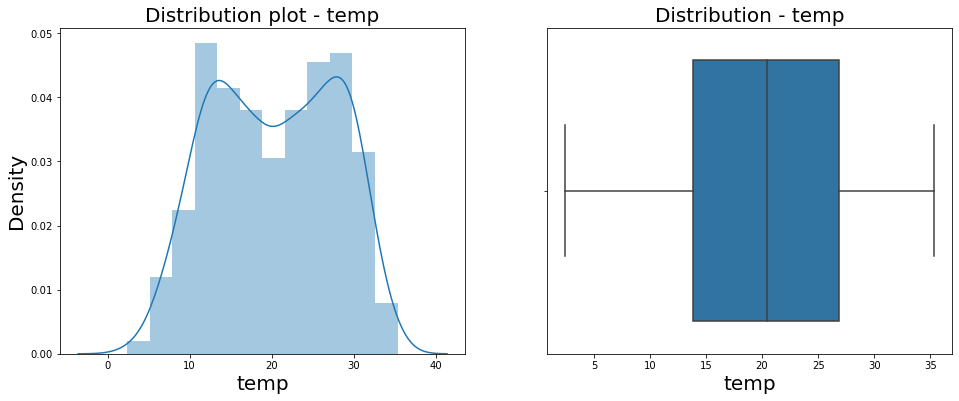

In [ ]:
# temp
uni_num_plot(data_numerical, "temp", "Distribution plot - temp", "Distribution - temp")
plt.show()

Clearly, it is a bimodal distribution.<br>
The temp variable does not seem to have any outliers.

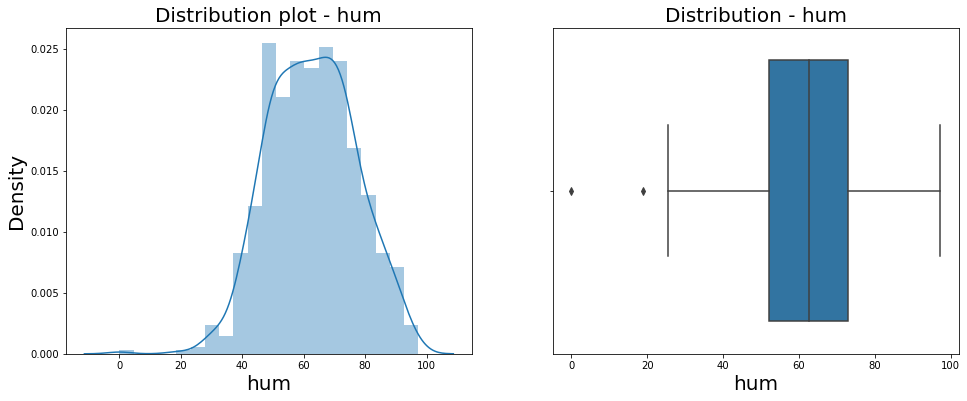

In [ ]:
# hum
uni_num_plot(data_numerical, "hum", "Distribution plot - hum", "Distribution - hum")
plt.show()

This is a unimodal distribution.<br>
The humidity seems to have very few outliers.

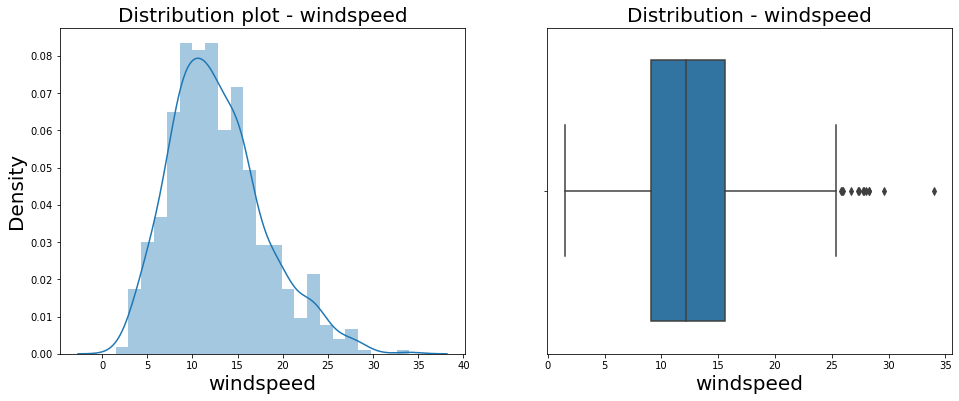

In [ ]:
# windspeed
uni_num_plot(data_numerical, "windspeed", "Distribution plot - windspeed", "Distribution - windspeed")
plt.show()

The windspeed seems to have a right skewed distribution.<br>
There are very few outliers as evident from the boxplot.

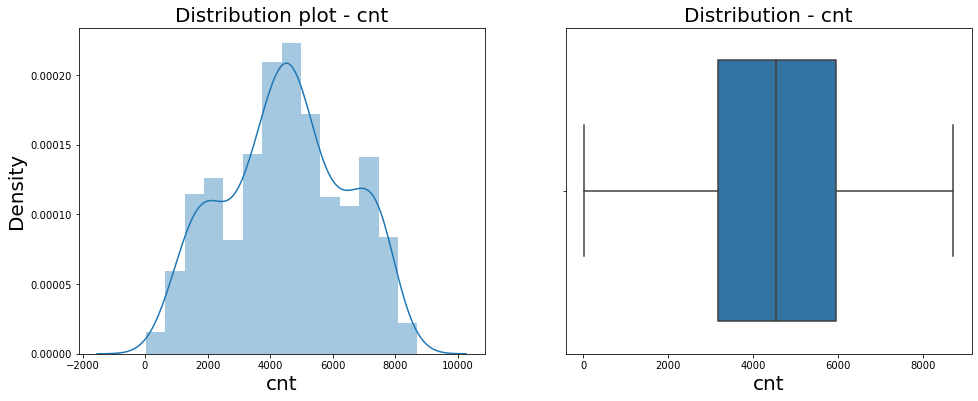

In [ ]:
# cnt
uni_num_plot(data_numerical, "cnt", "Distribution plot - cnt", "Distribution - cnt")
plt.show()

The distribution of the cnt variable is as shown above.<br>
The boxplot shows that there are no outliers.

##### Categorical Variables Analysis

In [ ]:
# User defined function
def uni_cat_plot(df, x, title):
    plt.figure(figsize=(10, 6))
    fontdict= {'fontsize': 20, 'fontweight': 5}
    sns.countplot(data = df, y= x, order= data[x].value_counts().index)
    plt.title(title, fontdict)
    plt.xlabel("Value Counts")
    plt.ylabel(x)

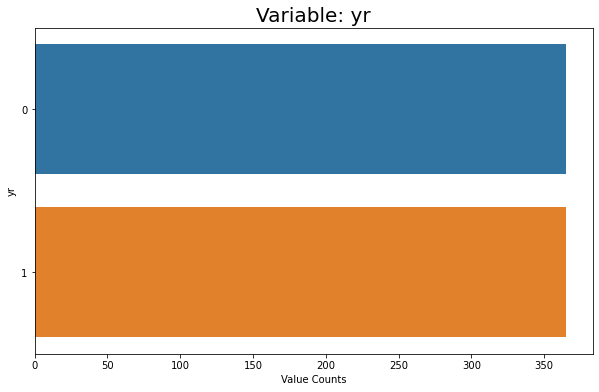

In [ ]:
# Analysing yr column
uni_cat_plot(data_categorical, 'yr', "Variable: yr")
plt.show()

We have data from both the years (0: 2018 and 1: 2019) with approximately equal proportions.

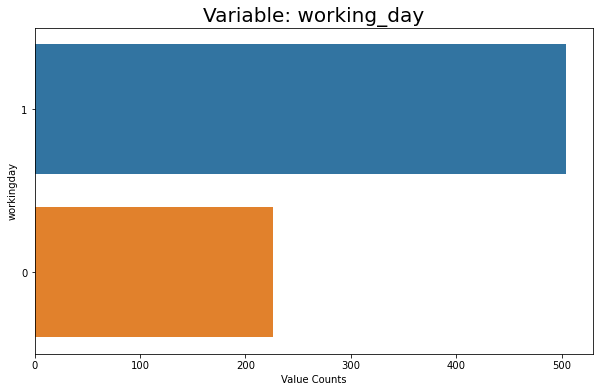

In [ ]:
# working day
uni_cat_plot(data_categorical, 'workingday', "Variable: working_day")
plt.show()

The data consists more of working day situation as compared to the opposite situation.

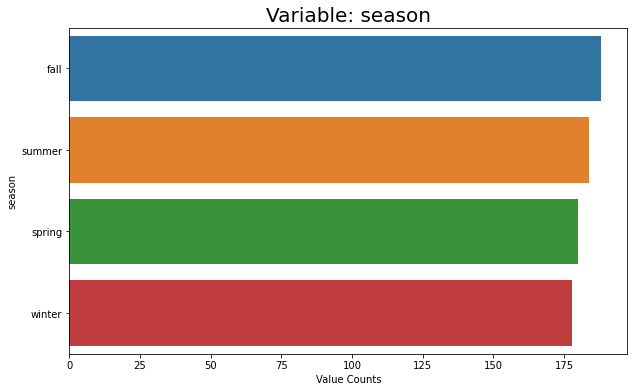

In [ ]:
# season
uni_cat_plot(data_categorical, 'season', "Variable: season")
plt.show()

The dataset comprises of similar number of data points from each of the four seasons: fall, summer, spring, and winter.<br>
However, fall tops the list.

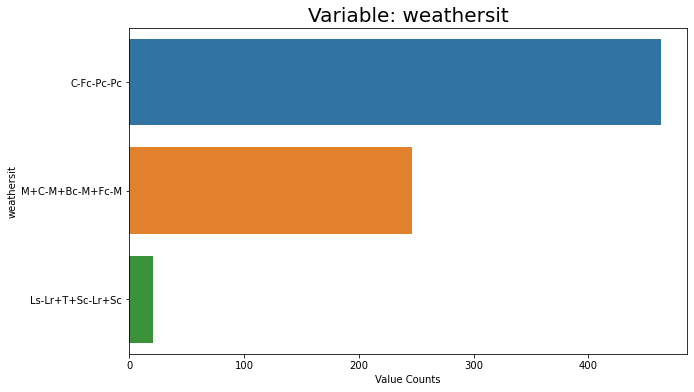

In [ ]:
# weathersit
uni_cat_plot(data_categorical, 'weathersit', "Variable: weathersit")
plt.show()

The dataset comprises of three weather situations, out of which Clear, Few clouds, Partly cloudy, Partly cloudy is the most dominant one.

In [ ]:
# value counts of weathersit
data_categorical.weathersit.value_counts()

C-Fc-Pc-Pc          463
M+C-M+Bc-M+Fc-M     246
Ls-Lr+T+Sc-Lr+Sc     21
Name: weathersit, dtype: int64

Here, 
- C-Fc-Pc-Pc  represents  `Clear, Few clouds, Partly cloudy, Partly cloudy`
- M+C-M+Bc-M+Fc-M  represents  `Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist`
- Ls-Lr+T+Sc-Lr+Sc  represents  `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds` 

### Bivariate Analysis

###### Visualizing categorical variables with the target variable cnt

In [ ]:
# user_defined function
def cat_num_plot(df, x1, title):
    
    fontdict= {'fontsize': 20, 'fontweight': 5}
    sns.boxplot(x = x1, y = 'cnt', data = data)
    plt.title(title, fontdict)

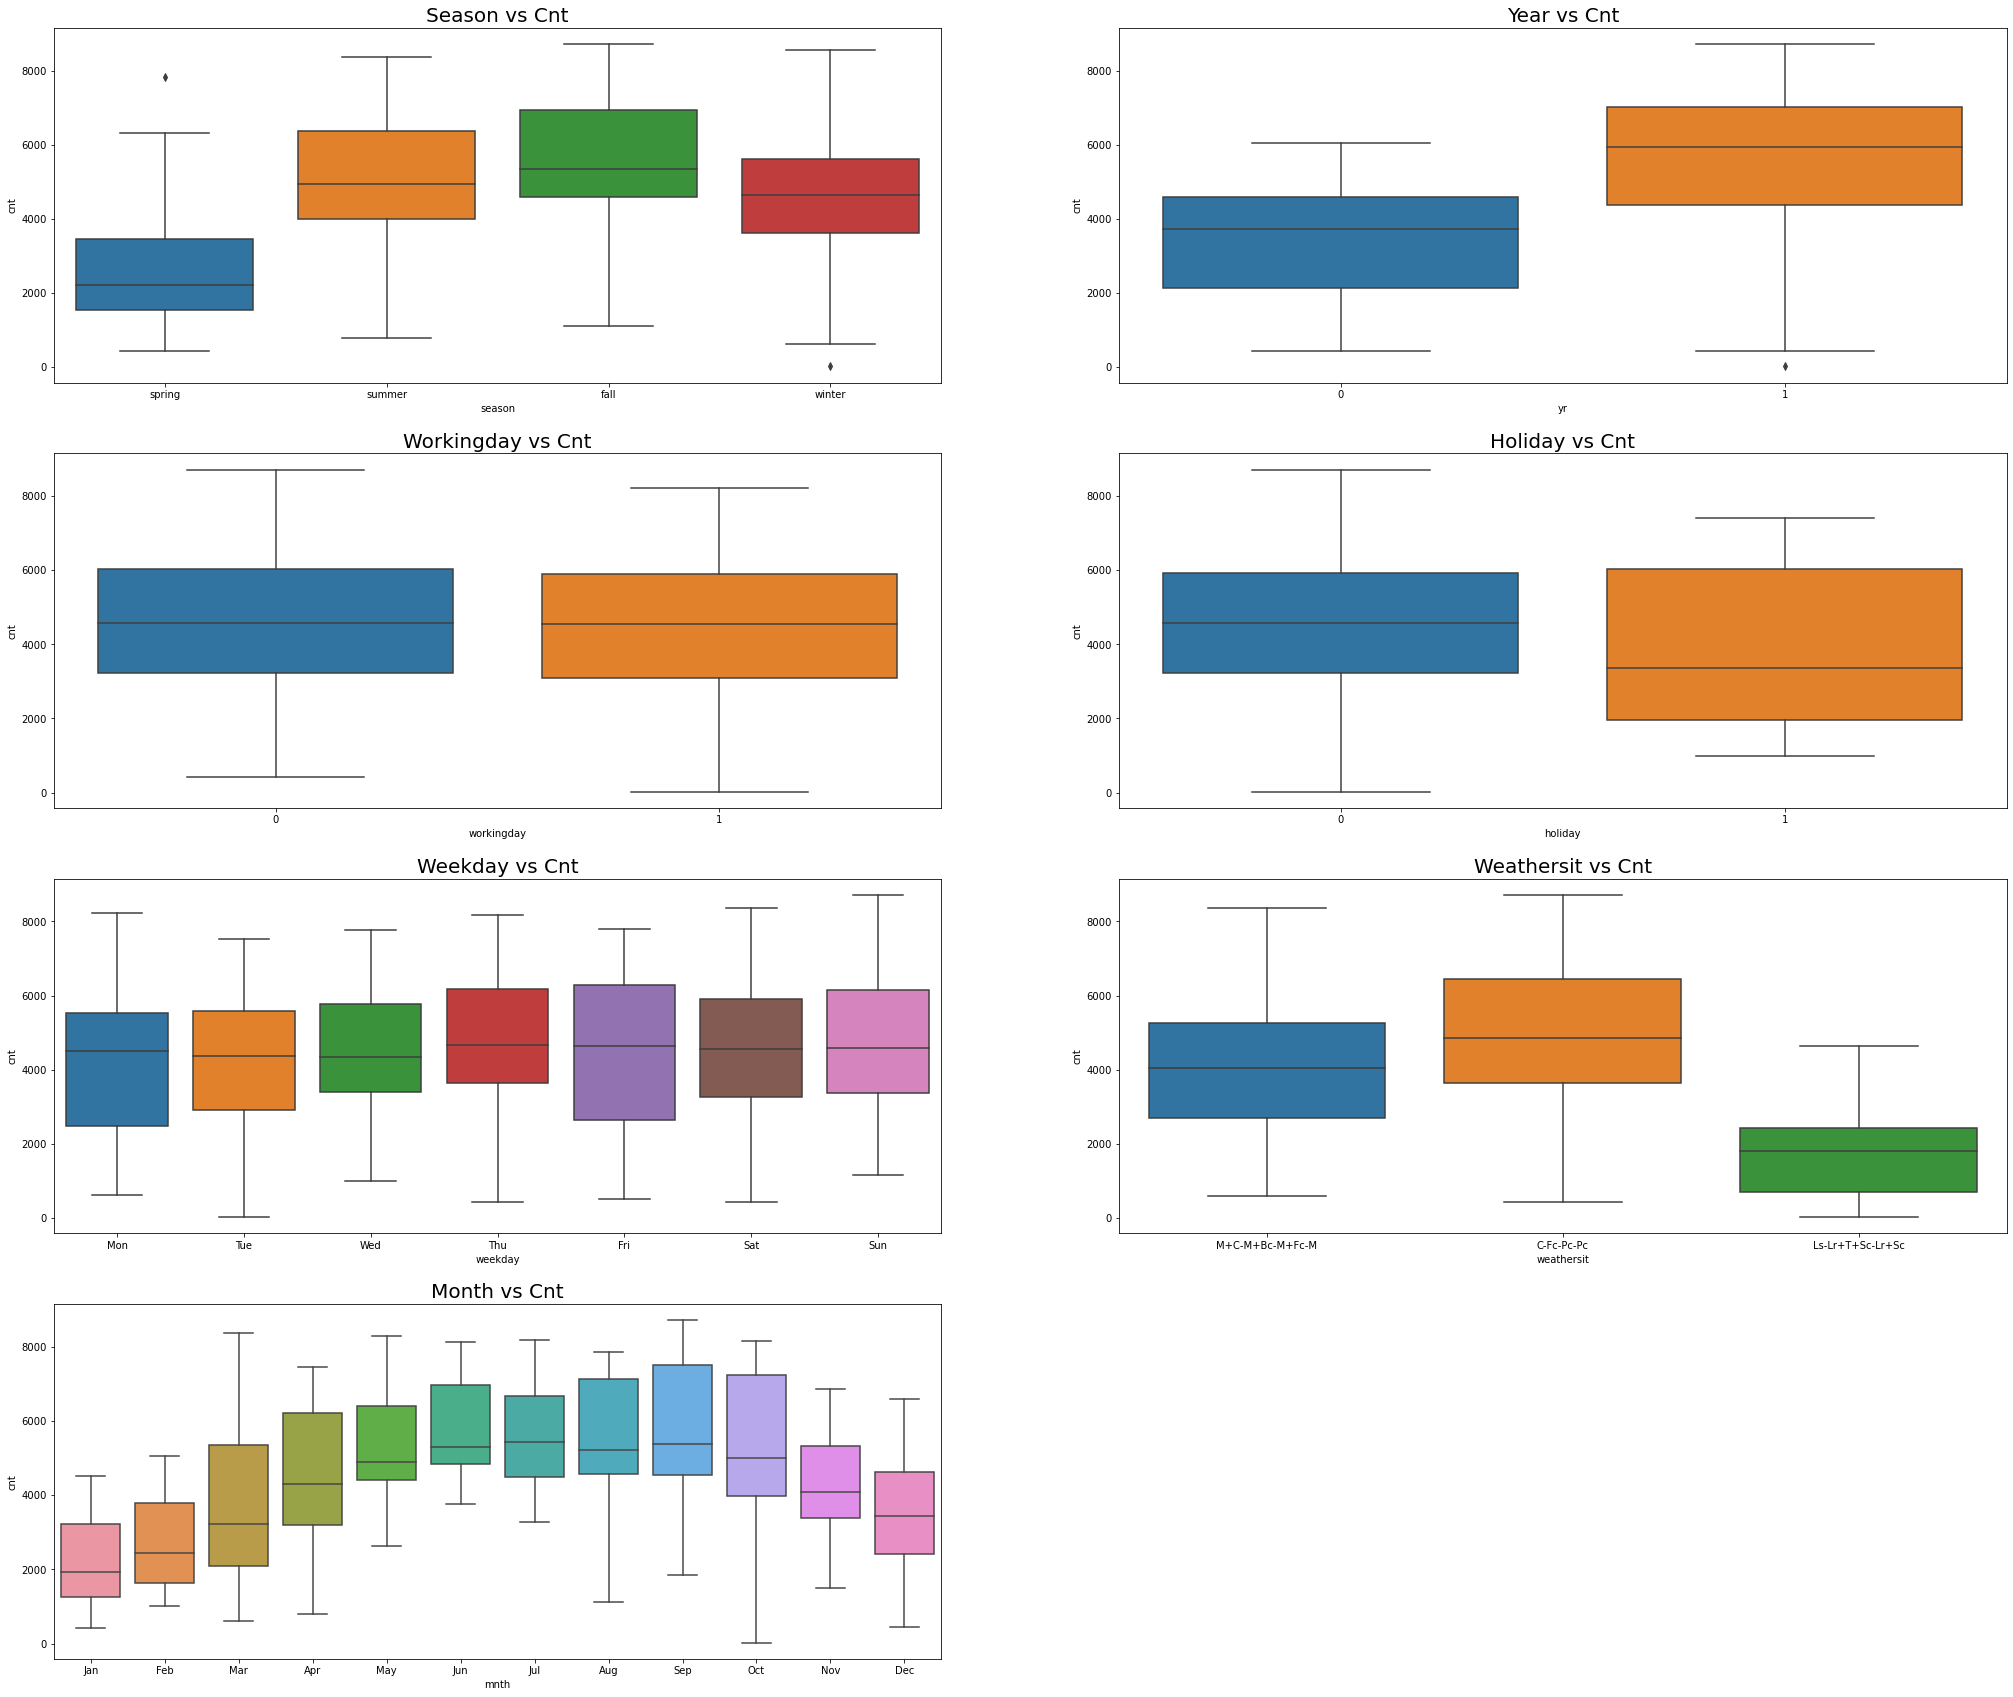

In [ ]:
plt.figure(figsize=(35, 30))

# season vs cnt
plt.subplot(4,2,1)
cat_num_plot(data, "season", "Season vs Cnt")

# yr vs cnt
plt.subplot(4,2,2)
cat_num_plot(data, "yr", "Year vs Cnt")

# workingday vs cnt
plt.subplot(4,2,3)
cat_num_plot(data, "workingday", "Workingday vs Cnt")

# holiday vs cnt
plt.subplot(4,2,4)
cat_num_plot(data, "holiday", "Holiday vs Cnt")

# weekday vs cnt
plt.subplot(4,2,5)
cat_num_plot(data, "weekday", "Weekday vs Cnt")

# weathersit vs cnt
plt.subplot(4,2,6)
cat_num_plot(data, "weathersit", "Weathersit vs Cnt")

# mnth vs cnt
plt.subplot(4,2,7)
cat_num_plot(data, "mnth", "Month vs Cnt")
plt.show()

This gives us a better understanding of the target variable w.r.t. different categorical variables.

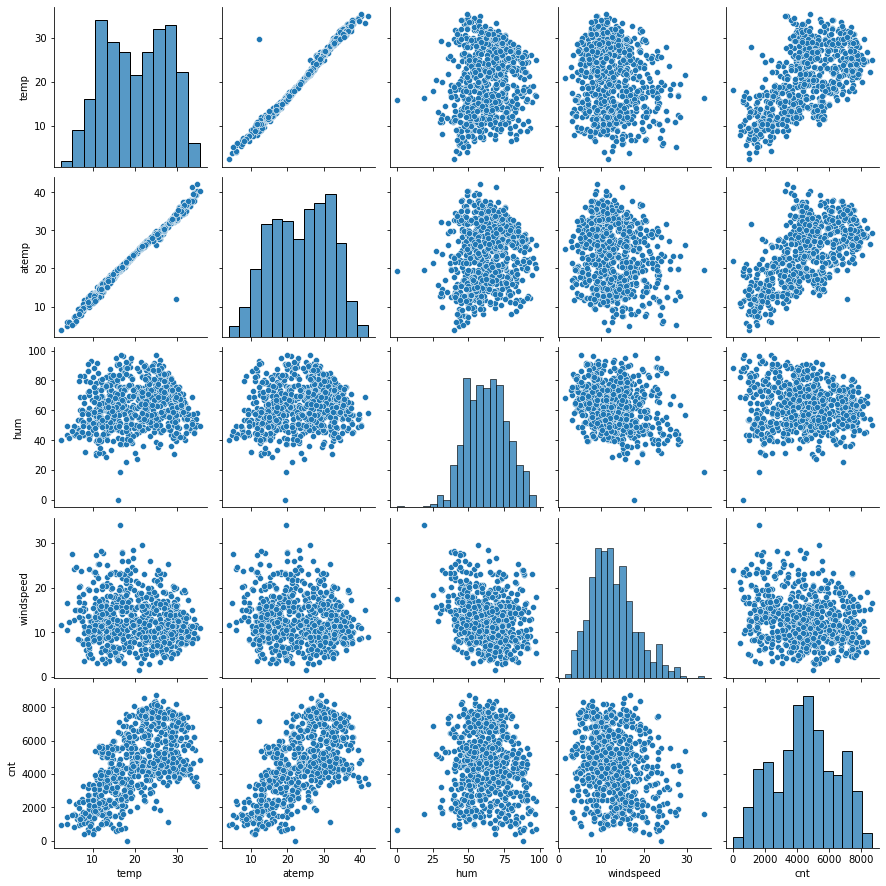

In [ ]:
# pairplot
sns.pairplot(data_numerical)
plt.show()

The above pairplot gives us an understanding of the numeric variables in our dataset.
- cnt and temp seems to be correlated.
- atemp and temp are also correlated.

### Multivariate Analysis

In [ ]:
# correlation matrix
data_numerical.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


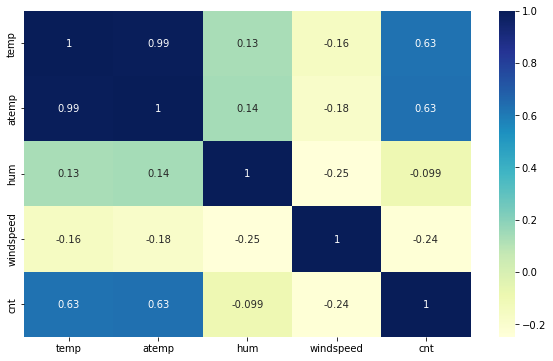

In [ ]:
# plotting heatmap for the correlation coefficients
plt.figure(figsize=(10, 6))
sns.heatmap(data_numerical.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Conclusions:**
- The correlation coefficient between cnt and temp as well as cnt and atemp is 0.63.
- There is a negative correlation between windspeed and temp, windspeed and cnt, etc.
- The correlation coefficient of temp and atemp is almost 1. This lets us understand that they are almost the same in nature and adding both won't add value to our model.

In [ ]:
# dropping temp from our dataset.
data.drop('temp', axis=1, inplace= True)

In [ ]:
# Checking the data frame
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,M+C-M+Bc-M+Fc-M,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,M+C-M+Bc-M+Fc-M,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,C-Fc-Pc-Pc,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,C-Fc-Pc-Pc,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,C-Fc-Pc-Pc,11.46350,43.6957,12.522300,1600


#### Dummy variable creation

In [ ]:
# Looking for dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [ ]:
# categorical columns
data_categorical.columns

Index(['holiday', 'weathersit', 'workingday', 'season', 'mnth', 'yr',
       'weekday'],
      dtype='object')

In [ ]:
# converting some of the categorical variables to object data type
data['mnth'] = data['mnth'].astype(object)
data['weekday'] = data['weekday'].astype(object)

In [ ]:
# info on different columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [ ]:
# creating dummy variables using pd.get_dummies
Seasons= pd.get_dummies(data['season'], drop_first= True)    #season
Month= pd.get_dummies(data['mnth'], drop_first= True)    #month      
Weekdays= pd.get_dummies(data['weekday'], drop_first= True)    #weekdays
Weather= pd.get_dummies(data['weathersit'], drop_first= True)    #weather

In [ ]:
# adding the created dummy variables in the main dataframe
data = pd.concat([data, Seasons], axis= 1)
data = pd.concat([data, Month], axis= 1)
data = pd.concat([data, Weekdays], axis= 1)
data = pd.concat([data, Weather], axis= 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   yr                730 non-null    int64  
 2   mnth              730 non-null    object 
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    object 
 5   workingday        730 non-null    int64  
 6   weathersit        730 non-null    object 
 7   atemp             730 non-null    float64
 8   hum               730 non-null    float64
 9   windspeed         730 non-null    float64
 10  cnt               730 non-null    int64  
 11  spring            730 non-null    uint8  
 12  summer            730 non-null    uint8  
 13  winter            730 non-null    uint8  
 14  Aug               730 non-null    uint8  
 15  Dec               730 non-null    uint8  
 16  Feb               730 non-null    uint8  
 1

In [ ]:
# dropping the columns, using which we have created all the dummy variables
data.drop(['season', 'mnth', 'weekday', 'weathersit'], axis= 1, inplace= True)
data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ls-Lr+T+Sc-Lr+Sc,M+C-M+Bc-M+Fc-M
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Mutliple Linear Regression

### Train test split

In [ ]:
# importing necessary libraries
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# perfroming train test split of the dataset
data_train, data_test = train_test_split(data, train_size= 0.70, test_size= 0.30, random_state= 100)
# this gives us two dataframes, namely, data_train, data_test
print(data_train.shape) # data_train shape
print(data_test.shape)  # data_test shape

(510, 29)
(219, 29)


In [ ]:
# train dataset
data_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ls-Lr+T+Sc-Lr+Sc,M+C-M+Bc-M+Fc-M
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# test dataset
data_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ls-Lr+T+Sc-Lr+Sc,M+C-M+Bc-M+Fc-M
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# describe train dataset
data_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ls-Lr+T+Sc-Lr+Sc,M+C-M+Bc-M+Fc-M
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There is a need to perform rescaling of features as we see that the variables are having a varied scales.

##### Rescaling of features

We should choose to use the Min Max Scaling which would limit the data from 0 to 1 and it will take care of outliers as well if there are any. 

In [ ]:
data_numerical.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler    #MinMaxScaler is a class
# Instantiating an object
scaler = MinMaxScaler()
# Create a list of numerical variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
# fitting and transforming the numerical variables of the dataset
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])
data_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ls-Lr+T+Sc-Lr+Sc,M+C-M+Bc-M+Fc-M
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
data_train[num_vars].describe()

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620
std,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.526811,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


Clearly, we have successfully transformed the variables in the dataset.

In [ ]:
# Creating X and y
y_train = data_train.pop('cnt') # pops the target variable out of the train dataset
X_train = data_train #remaining train dataset gets stored in the X_train variable

In [ ]:
# X_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ls-Lr+T+Sc-Lr+Sc,M+C-M+Bc-M+Fc-M
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# y_train
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### RFE - Recursive Feature Elimination

In [ ]:
# importing necessary modules
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator= lm, n_features_to_select= 15)    
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 10),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 3),
 ('Sun', False, 4),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Ls-Lr+T+Sc-Lr+Sc', True, 1),
 ('M+C-M+Bc-M+Fc-M', True, 1)]

In [ ]:
# The columns selected using rfe technique
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'Nov', 'Sep', 'Ls-Lr+T+Sc-Lr+Sc',
       'M+C-M+Bc-M+Fc-M'],
      dtype='object')

In [ ]:
# The columns rejected using rfe technique
X_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'Jul', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

#### Building model using statsmodels
- Statsmodels gives us a detailed statistical report
- For rejection of a parameter, we would make use of the following:
    - p-value should be greater than 0.05
    - VIF should be greater than 5.
    - Rejection of any parameter should not bring down the $R^2$ or the $Adjusted R^2$ value significantly.

In [ ]:
# importing necessary libraries and modules
import statsmodels.api as sm

In [ ]:
# Creating X_train dataframe using rfe selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [ ]:
# user-defined function
def lin_model(x1):
    # Running the linear model
    lm = sm.OLS(y_train, x1).fit()
    # print the statistical summary
    print(lm.summary()) 

In [ ]:
# using the user defined function lin_model, building the model with X_trian_rfe1
lin_model(X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.26e-186
Time:                        23:28:13   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2936      0.032  

The p-values of the variables are within the range.

In [ ]:
# importing necessary library and modules
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# user-defined function
def calculate_vif(x1):
    # creating dataframe vif
    vif = pd.DataFrame()
    X = x1
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF", ascending= False)
    return vif

In [ ]:
# calculating VIF for the model that has been built
calculate_vif(X_train_rfe)

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,winter,3.04
5,summer,2.28
14,M+C-M+Bc-M+Fc-M,2.24
0,yr,2.06
10,Jan,1.92
11,Nov,1.85
8,Dec,1.63


As per the observation, column 'hum' has a high VIF. Therefore, we need to remove it.

In [ ]:
# dropping hum 
X_train_rfe.drop('hum', axis=1, inplace= True)

In [ ]:
# adding constant 
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [ ]:
# building model with X_train_rfe2
lin_model(X_train_rfe2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          7.00e-184
Time:                        23:28:14   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2114      0.026  

In [ ]:
# calculating vif
calculate_vif(X_train_rfe)

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,winter,2.62
0,yr,2.06
4,summer,2.04
10,Nov,1.81
6,Aug,1.59
13,M+C-M+Bc-M+Fc-M,1.57
7,Dec,1.41
11,Sep,1.35


Column atemp has a vif close to 5. Hence, we should try dropping it and see its impact.

In [ ]:
# dropping atemp
X_train_rfe.drop("atemp", axis= 1, inplace=True)

In [ ]:
# adding constant
X_train_rfe3 = sm.add_constant(X_train_rfe)

In [ ]:
# building the model with X_train_rfe3
lin_model(X_train_rfe3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     127.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          6.20e-149
Time:                        23:28:15   Log-Likelihood:                 413.36
No. Observations:                 510   AIC:                            -798.7
Df Residuals:                     496   BIC:                            -739.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5180      0.016  

We see that there is a considerable drop in the value of R-squared and Adjusted R-squared.

Therefore, the model obtained by using X_train_rfe2 is a good model as we have all the p-values within limit and vif values also in the safe range.

In [ ]:
# to obtain the model, we need to re-run the model 
lm_final = sm.OLS(y_train, X_train_rfe2).fit()

In [ ]:
# Predicting values
y_train_cnt = lm_final.predict(X_train_rfe2)

#### Residual Analysis

In [ ]:
# calculating residuals
res = y_train - y_train_cnt

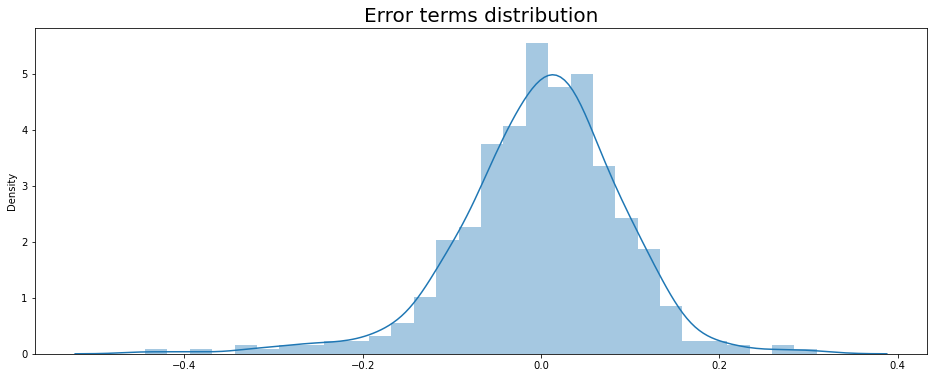

In [ ]:
# verifying the assumptions of normality
# plotting histogram of error terms
plt.figure(figsize=(16, 6))
sns.distplot(res)
fontdict = {'fontsize': 20, 'fontweight': 10}
plt.title("Error terms distribution", fontdict)
plt.show()

Clearly, the distribution is normal and is centred at 0.

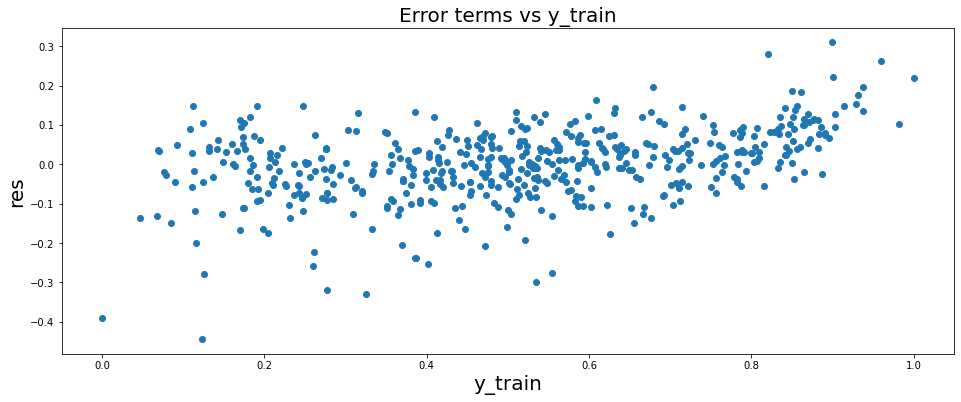

In [ ]:
# Looking for patterns in the residuals, if any
plt.figure(figsize=(16, 6))
plt.scatter(y_train, res)
fontdict = {'fontsize': 20, 'fontweight': 10}
plt.title("Error terms vs y_train", fontdict)
plt.xlabel("y_train", fontdict)
plt.ylabel("res", fontdict)
plt.show()

Clearly, we don't see any pattern in the error terms and hence, they are independent of each other.

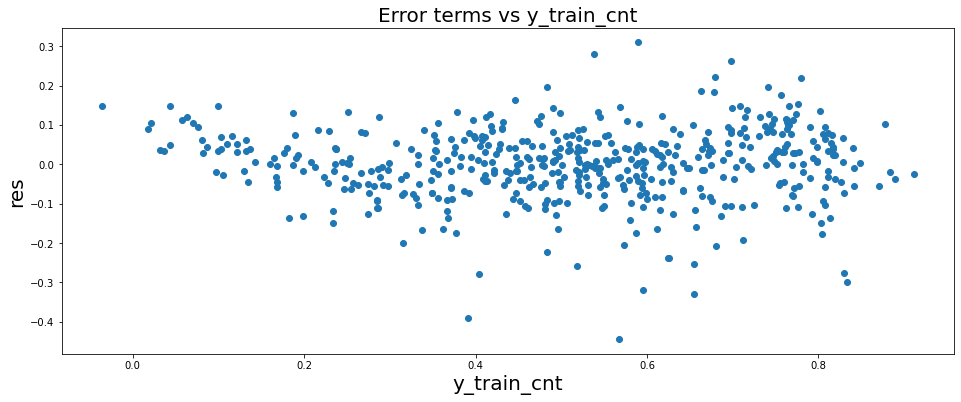

In [ ]:
# plotting res vs y_train_cnt to verify homoscedasticity
plt.figure(figsize=(16, 6))
plt.scatter(y_train_cnt, res)
fontdict = {'fontsize': 20, 'fontweight': 10}
plt.title("Error terms vs y_train_cnt", fontdict)
plt.xlabel("y_train_cnt", fontdict)
plt.ylabel("res", fontdict)
plt.show()

From the above plot, we can state that the variance of error terms is almost a constant as the value of the error terms changes. This justifies another assumption of homoscedasticity.

In [ ]:
# printing the necessary values
print(X_train_rfe2.columns)
print("*"*100)
print(X_train_rfe2.shape)
print("*"*100)
print(res.shape)

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'summer', 'winter',
       'Aug', 'Dec', 'Feb', 'Jan', 'Nov', 'Sep', 'Ls-Lr+T+Sc-Lr+Sc',
       'M+C-M+Bc-M+Fc-M'],
      dtype='object')
****************************************************************************************************
(510, 15)
****************************************************************************************************
(510,)


In [ ]:
# scaling the test variable
# in case of test variable, we do not fit_transform, we only transform
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [ ]:
data_test[num_vars].describe()

,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000
mean,0.532991,0.638508,0.313350,0.520592
std,0.217888,0.148974,0.159947,0.218435
min,0.025950,0.261915,-0.042808,0.048205
25%,0.344751,0.527265,0.198517,0.377531
50%,0.549198,0.627737,0.299459,0.524275
75%,0.714132,0.743928,0.403048,0.672745
max,0.980934,1.002146,0.807474,0.963300


In [ ]:
# Creating X and y variables
y_test = data_test.pop('cnt')
X_test = data_test

In [ ]:
X_train_new = X_train_rfe2.drop('const', axis= 1)

####  Making predictions

In [ ]:
# using the model to make predictions
# creating X_test using the variables from the X_train_new
X_test_new = X_test[X_train_new.columns]

In [ ]:
# adding constant
X_test_new1 = sm.add_constant(X_test_new)

In [ ]:
# Making prediction using the built model
y_test_pred = lm_final.predict(X_test_new1)

## Finding R-squared and Adjusted R-squared for Test set

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8061448794677019

In [ ]:
# calculating Adjusted R-squared
Adjusted_R2 = 1-((1-0.806144879)*(len(y_test)-1)/(len(y_test)-14-1))
Adjusted_R2

0.7928410961862745

In [ ]:
# calculating R-squared value for train dataset
r2_score(y_train, y_train_cnt)

0.8358540764456329

In [ ]:
# calculating Adjusted R-squared
Adjusted_R2 = 1-((1-0.83585407644)*(len(y_train)-1)/(len(y_train)-14-1))
Adjusted_R2

0.8312115654706262

### R-squared and Adjusted R-squared value comparison
The values of the metrics for the train dataset:
- $R^2$: 0.83585
- $Adjusted-R^2$: 0.83121

The values of the metrics for the test dataset:
- $R^2$: 0.8061
- $Adjusted-R^2$: 0.7928

Difference in $R^2$ between train and test: 3.56 % <br>
Difference in $Adjusted R^2$ between train and test: 4.62 % 

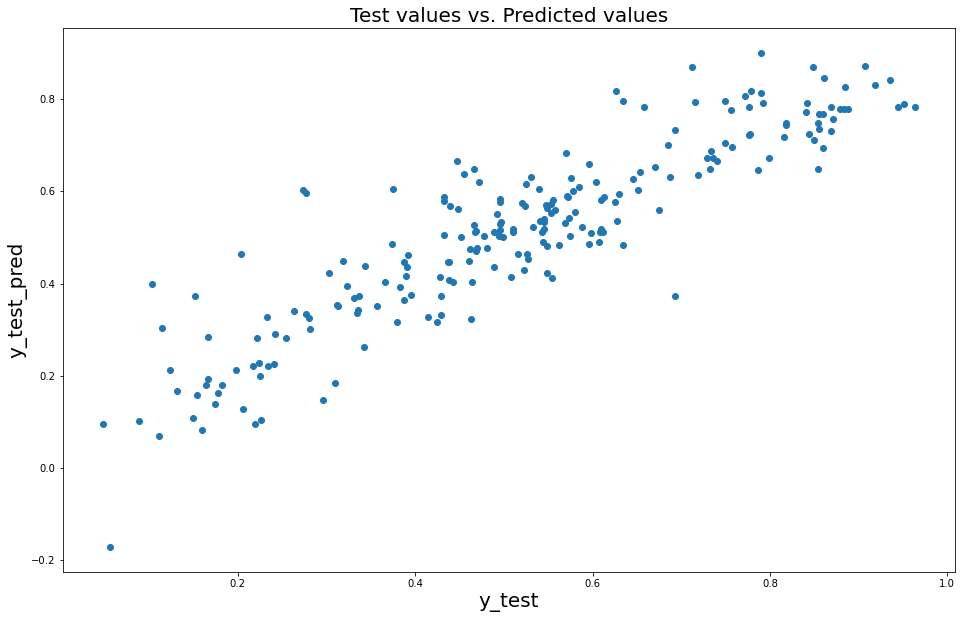

In [ ]:
# checking predicted vs. Test data
plt.figure(figsize=(16, 10))
fontdict = {'fontsize': 20, 'fontweight': 5}
plt.scatter(y_test, y_test_pred)
plt.title("Test values vs. Predicted values", fontdict)
plt.xlabel("y_test", fontdict)
plt.ylabel("y_test_pred", fontdict)
plt.show()

Visualizing the fit on the test side.

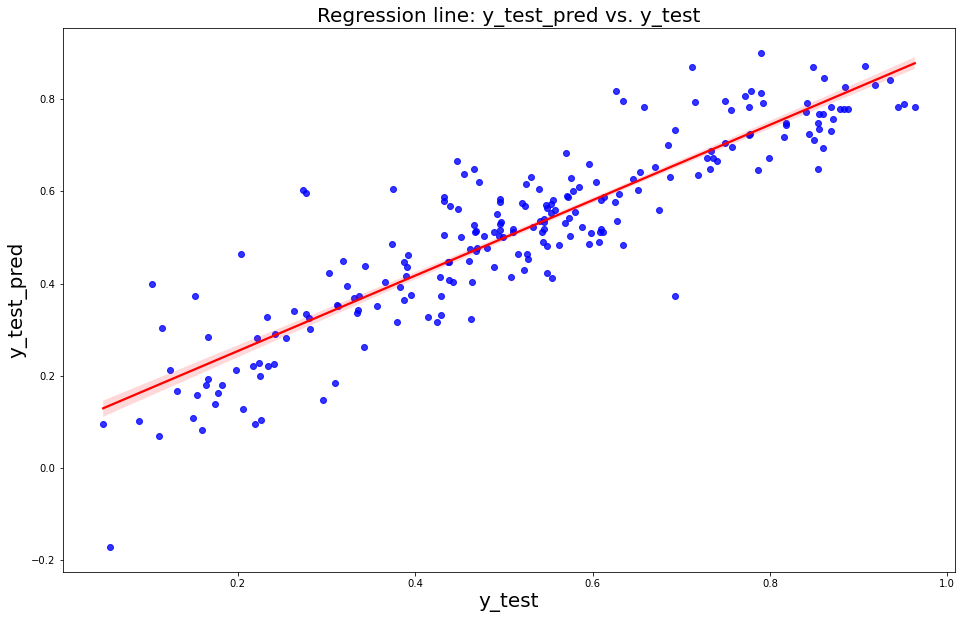

In [ ]:
# visualizing the fit
plt.figure(figsize= (16, 10))
fontdict = {'fontsize': 20, 'fontweight': 5}
sns.regplot(x= y_test, y= y_test_pred, ci= 68, fit_reg= True, scatter_kws= {'color': 'blue'}, line_kws= {'color': 'red'})
plt.title("Regression line: y_test_pred vs. y_test", fontdict)
plt.xlabel("y_test", fontdict)
plt.ylabel("y_test_pred", fontdict)
plt.show()

Clearly, we have a model which is good enough to predict the demand of bikes.

The **equation** for the best fitted line is:
$count = 0.2114 + 0.2349 \times yr - 0.0851 \times holiday + 0.4432 \times atemp - 0.1493 \times windspeed + 0.0723 \times summer + 0.1244 \times winter + 0.0580 \times Aug - 0.0585 \times Dec - 0.0565 \times Feb - 0.0875 \times Jan - 0.442 \times Nov - 0.1044 \times Sep - 0.2875 \times Ls-Lr+T+Sc-Lr+Sc - 0.0828 \times M+C-M+Bc-M+Fc-M$

Where, $𝑀+𝐶−𝑀+𝐵𝑐−𝑀+𝐹𝑐−𝑀$ denotes Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist and $𝐿𝑠−𝐿𝑟+𝑇+𝑆𝑐−𝐿𝑟+𝑆𝑐$ denotes Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


#### Conclusions

- We can see that atemp has the highest coefficient of 0.4432 which implies that if the value of atemp increases by 1 unit, then, the value of count increases by 0.4432 units, provided all the other factors are constant.
- There are some variables which have negative coefficients which suggests that as there is an increase in the independent variable, there is a decrease in the dependent variable. 
- In the case of the negative coefficient, the magnitude decides the strength with which the dependent variabels decrease when there is an increase in the independent variable.

#### Final recommendations
- Clearly feeling temperature in celsius (atemp) shall be a driving factor for making decisions.
- The demand of bikes in 2019 was more in comparison to the demand in 2018 which suggests that there was an uptrend in the demand.
- Working days also have a good impact on the bike rentals. Hence, it can be a great idea to provide interesting offers to the working individuals.